# Comparative Study

### Investigate the performance of a number of machine learning procedures

To run the notebook properly you will need to have installed the following packages.
- matplotlib (pip install matplotlib)
- sklearn (pip install scikit-learn)
- numpy (pip install numpy)


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
training_dataset = "CE802_P2_Data.csv"
test_dataset = "CE802_P2_Test.csv"
tra_data = pd.read_csv(training_dataset)
tst_data = pd.read_csv(test_dataset)

tra_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,9.07,34.65,31.22,-10.71,55,39.45,-1.68,-5.98,3.72,20,16.23,-241.52,-7.54,13.70,-6.41,False
1,6.86,99.65,31.22,-11.41,50,30.45,5.55,-8.42,7.11,20,28.47,-421.52,-8.10,14.50,NaN,False
2,10.87,21.65,25.22,-5.98,12,2.91,9.81,-0.36,-12.66,2,30.87,-254.52,0.24,0.40,NaN,False
3,11.27,13.65,25.22,-6.18,33,1.77,1.92,1.84,-2.49,2,27.99,-234.52,0.20,0.30,NaN,False
4,10.19,27.65,29.22,-6.21,30,4.47,1.35,-0.50,-8.19,2,27.63,-266.52,0.44,1.76,NaN,True


### Pre-process data

Data preprocessing happens here 

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold


In [5]:
def pre_process(dataset):
    
    dataset['F15'].fillna((dataset['F15'].mean()), inplace=True)
    features = dataset.drop('Class', axis=1)
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
    selected_features =sel.fit_transform(scaled_features)
    data = dict();
    data['features'] = selected_features
    
    data['class']   = dataset['Class']
    return (data)

In [6]:
proc_training_data = pre_process(tra_data)

tra_features = proc_training_data['features']
tra_class = proc_training_data['class']





### split data

uses the sklearn model selection library to split the training data into a training set and test set. It creates a random test set using 20% amount of the samples (test_size).

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tra_features, tra_class, test_size=0.20)

### Train model

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
def train_model(classifier):
    #ada_clf = AdaBoostClassifier(classifier, n_estimators = 200, algorithm = "SAMME.R", learning_rate = 0.5)
    return (classifier.fit(X_train, y_train))

### Evaluate model
this section highlights the values used to evaluate the predictions. 

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

def eval_model(prediction):
    
    print(confusion_matrix(y_test, prediction))
    print("Precision:",metrics.precision_score(y_test, prediction))
    print("Recall:",metrics.recall_score(y_test, prediction))
    print("accuracy: ",accuracy_score(y_test, prediction))

## Building Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = train_model(classifier)


In [12]:
y_pred = classifier.predict(X_test)


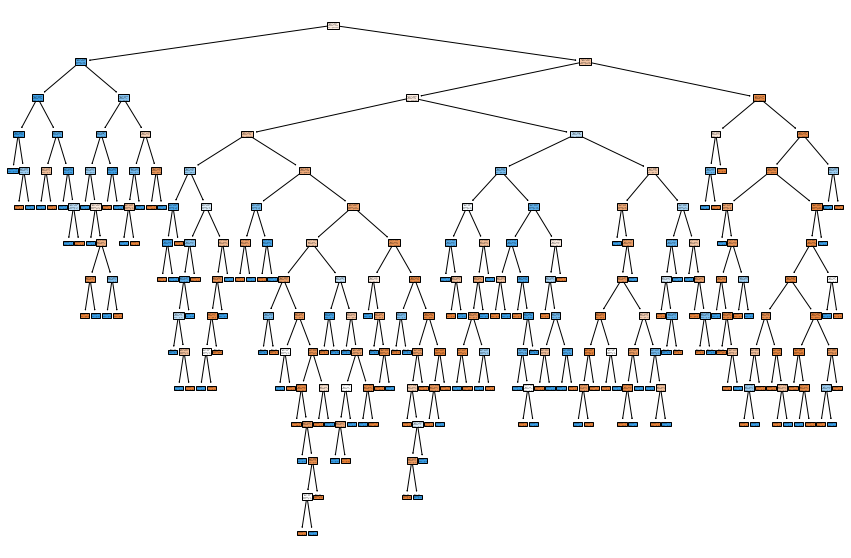

In [13]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

plt.show()

In [14]:
eval_model(y_pred)

[[137  25]
 [ 33 105]]
Precision: 0.8076923076923077
Recall: 0.7608695652173914
accuracy:  0.8066666666666666


### Post Prune Tree
 improve the models ability to generalise 

In [15]:
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00078431, 0.00078704, 0.00079545, 0.0008    ,
       0.00080065, 0.00082596, 0.00082677, 0.00082875, 0.00083333,
       0.00090294, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
       0.00111111, 0.00111111, 0.00111111, 0.00125   , 0.00125   ,
       0.00125   , 0.00125   , 0.00125   , 0.00132707, 0.00133333,
       0.00133333, 0.00133796, 0.00138158, 0.00138889, 0.00138889,
       0.00138889, 0.00139434, 0.00147692, 0.00148148, 0.00148148,
       0.00151515, 0.00151515, 0.00153846, 0.00155556, 0.00155813,
       0.00155909, 0.0015625 , 0.0015625 , 0.0015812 , 0.0016129 ,
       0.00162162, 0.00174603, 0.001893  , 0.00201662, 0.00202991,
       0.00210556, 0.00212374, 0.00218939, 0.00220009, 0.00224656,
       0.00224873, 0.00246154, 0.00256209, 0.00261029, 0.00262727,
       0.00285714, 0.00293255, 0.00319825, 0.00336111, 0.00337405,
       0.00343249, 0.00345337, 0.00346655, 0.00351326, 0.0036807 ,
       0.00400084, 0.00431551, 0.00465769, 0.0049509 , 0.00517

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [17]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [18]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [19]:
pred=clf.predict(X_test)
eval_model(pred)

[[137  25]
 [ 35 103]]
Precision: 0.8046875
Recall: 0.7463768115942029
accuracy:  0.8


[Text(418.5, 489.24, 'X[14] <= -0.27\ngini = 0.497\nsamples = 1200\nvalue = [647, 553]'),
 Text(313.875, 380.52000000000004, 'gini = 0.214\nsamples = 254\nvalue = [31, 223]'),
 Text(523.125, 380.52000000000004, 'X[14] <= 0.11\ngini = 0.454\nsamples = 946\nvalue = [616, 330]'),
 Text(418.5, 271.8, 'X[11] <= 0.574\ngini = 0.496\nsamples = 675\nvalue = [366, 309]'),
 Text(209.25, 163.08000000000004, 'X[12] <= -1.203\ngini = 0.452\nsamples = 376\nvalue = [246, 130]'),
 Text(104.625, 54.360000000000014, 'gini = 0.434\nsamples = 88\nvalue = [28, 60]'),
 Text(313.875, 54.360000000000014, 'gini = 0.368\nsamples = 288\nvalue = [218, 70]'),
 Text(627.75, 163.08000000000004, 'X[3] <= 0.942\ngini = 0.481\nsamples = 299\nvalue = [120, 179]'),
 Text(523.125, 54.360000000000014, 'gini = 0.357\nsamples = 172\nvalue = [40, 132]'),
 Text(732.375, 54.360000000000014, 'gini = 0.466\nsamples = 127\nvalue = [80, 47]'),
 Text(627.75, 271.8, 'gini = 0.143\nsamples = 271\nvalue = [250, 21]')]

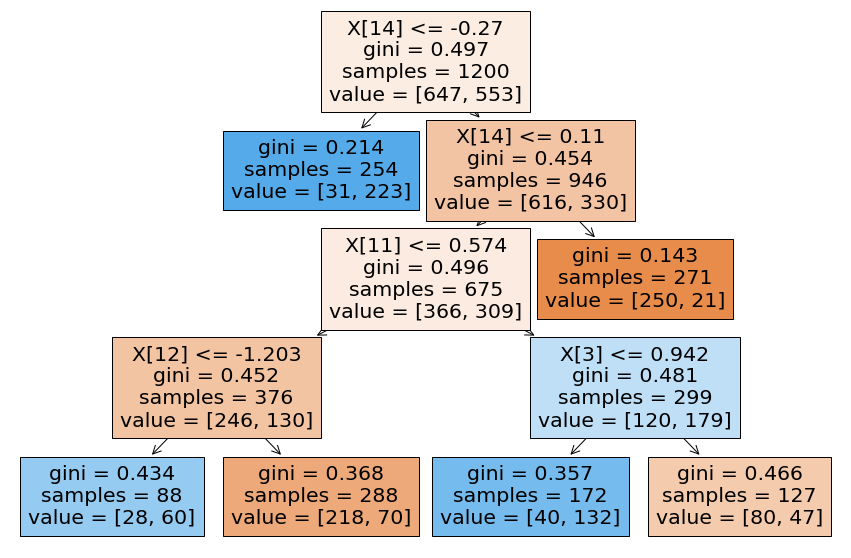

In [20]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

## Building Support Vector Machine model

In [21]:
from sklearn import svm

In [22]:
reg_param = 2.0003
svm_clf = svm.SVC(probability = True, kernel='linear', C=reg_param)

svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print(svm_pred)

[False False False  True False False False  True  True False False  True
 False False  True  True  True False  True False  True False  True  True
 False  True False  True  True  True  True False  True False  True  True
 False False False  True  True  True False False  True False  True  True
 False  True  True  True  True  True  True False False False False  True
  True  True  True  True  True False False False False False  True  True
 False False False False False False False  True  True  True  True  True
 False  True False  True  True  True False False  True False False False
  True  True False  True  True False  True  True False  True False  True
 False False  True False  True False  True  True False False  True  True
  True  True False False False False  True False  True False False  True
  True False  True  True False False False  True False False  True  True
  True False False False False  True  True  True False False False False
 False  True False False False False False False  T

In [23]:
eval_model(svm_pred)

[[144  18]
 [ 23 115]]
Precision: 0.8646616541353384
Recall: 0.8333333333333334
accuracy:  0.8633333333333333


## Building KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_pred = knn_clf.predict(X_test)


In [27]:
print(knn_pred)

[False False False False False  True False  True False False False  True
  True False  True False  True  True  True False  True False  True  True
  True False False  True  True  True False False False False False  True
 False False False False False  True False False False False False  True
  True  True  True  True  True  True  True False False False False  True
 False  True  True  True  True False  True False  True False  True  True
  True False False False False False  True  True  True False  True False
 False False  True False False  True False False False False  True False
  True False False False False False  True  True False  True False False
 False False  True False  True False False  True False False  True  True
 False False False False False False  True False  True  True False False
  True False  True False False  True False  True  True  True  True  True
  True False False False False False False  True False False False False
 False  True False False False False False  True  T

In [28]:
eval_model(knn_pred)

[[137  25]
 [ 46  92]]
Precision: 0.7863247863247863
Recall: 0.6666666666666666
accuracy:  0.7633333333333333


## Prediction on a hold-out test set

In [29]:
test_dataset = "CE802_P2_Test.csv"
tst_data = pd.read_csv(test_dataset)
test_set = pre_process(tst_data)

test_features = test_set['features']
tst_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,6.64,59.65,51.22,-12.11,35,30.75,-2.94,-9.76,4.50,20,22.80,-296.52,-9.82,10.40,-7.696347,NaN
1,11.42,23.65,29.22,-5.98,1,0.84,5.79,2.52,-7.77,2,28.35,-244.52,0.70,1.18,-8.380000,NaN
2,6.13,54.65,51.22,-12.41,55,27.75,-0.81,-10.20,11.07,20,14.88,-341.52,-10.06,13.30,-7.696347,NaN
3,6.68,9.65,51.22,-10.81,155,21.00,-2.61,-9.16,6.00,20,16.29,-291.52,-7.16,13.10,-6.680000,NaN
4,10.74,24.65,25.22,-6.24,5,4.92,0.72,-1.72,-2.52,2,37.02,-271.52,-1.82,1.48,-8.570000,NaN


In [30]:
test_set_pred = svm_clf.predict(test_features)

print(test_set_pred)

tst_data['Class'] = test_set_pred
tst_data.to_csv ("CE802_P2_Test.csv", index=False, header=True)

[ True  True  True ... False  True  True]
